In [1]:
import pandas as pd
import matplotlib.pyplot as plt


def plot(filename, outlier_filter=1.3,a=1,b=0,plot_red=0):
    print(filename)
    df = pd.read_csv(filename)

    df['time'] = pd.to_datetime(df['time'])
    df['relative_time'] = df['time'] - df['time'].iloc[0]
    df['relative_time_seconds'] = df['relative_time'].dt.total_seconds()


    
    
    def remove_outliers(df, column_name):
        #return df
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_filter * IQR
        upper_bound = Q3 + outlier_filter * IQR
        return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    # Assuming the second column is 'measurement1' and the third column is 'measurement2'
    
    df_filtered = remove_outliers(df, df.columns[1])
    df_filtered = remove_outliers(df_filtered, df_filtered.columns[2])
    
    print("filtered count:", len(df) - len(df_filtered))
    
    time = df_filtered['relative_time_seconds'] # Time data -
    # Second and third columns after outlier removal
    x = df_filtered.iloc[:, 1]  # Second column
    y = df_filtered.iloc[:, 2]  # Third column
       


    y_calc = y * a + b
    indices = df_filtered.index  # Indices of the data points
    
    # Create a scatter plot with color coding based on index
    plt.figure(figsize=(15, 10))
    plt.scatter(x, y, c=indices, cmap='viridis')
    #plt.colorbar(label='Index of Data Point')  # Adds a color bar to the plot to show the index scale
    plt.xlabel('Temperature')
    plt.ylabel('Resistance')
    plt.title('Scatter Plot of Temperature vs Resistance (Color Coded by Index)')
    
    plt.show()
    
    plt.figure(figsize=(12, 8))  # Optional: Set figure size
    plt.scatter(time, y_calc, c='blue',)  # Use a single color or apply a colormap if preferred
    if plot_red: 
        plt.scatter(time, x, c='red')  # Use a single color or apply a colormap if preferred
    plt.xlabel('Time (s)')
    plt.ylabel('Resistance')
    plt.title('Change of resistance over time')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()  # Adjust layout to make room for label rotation
    plt.show()
    if not plot_red: 
        plt.figure(figsize=(12, 4))  # Optional: Set figure size
        plt.scatter(time, x, c='red')  # Use a single color or apply a colormap if preferred
        plt.xlabel('Time (s)')
        plt.ylabel('Temp')
        plt.title('Change of temp')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
        plt.tight_layout()  # Adjust layout to make room for label rotation
        plt.show()

    print("Average temperature: ", df_filtered.iloc[:, 1].mean())



loop1.csv
filtered count: 13


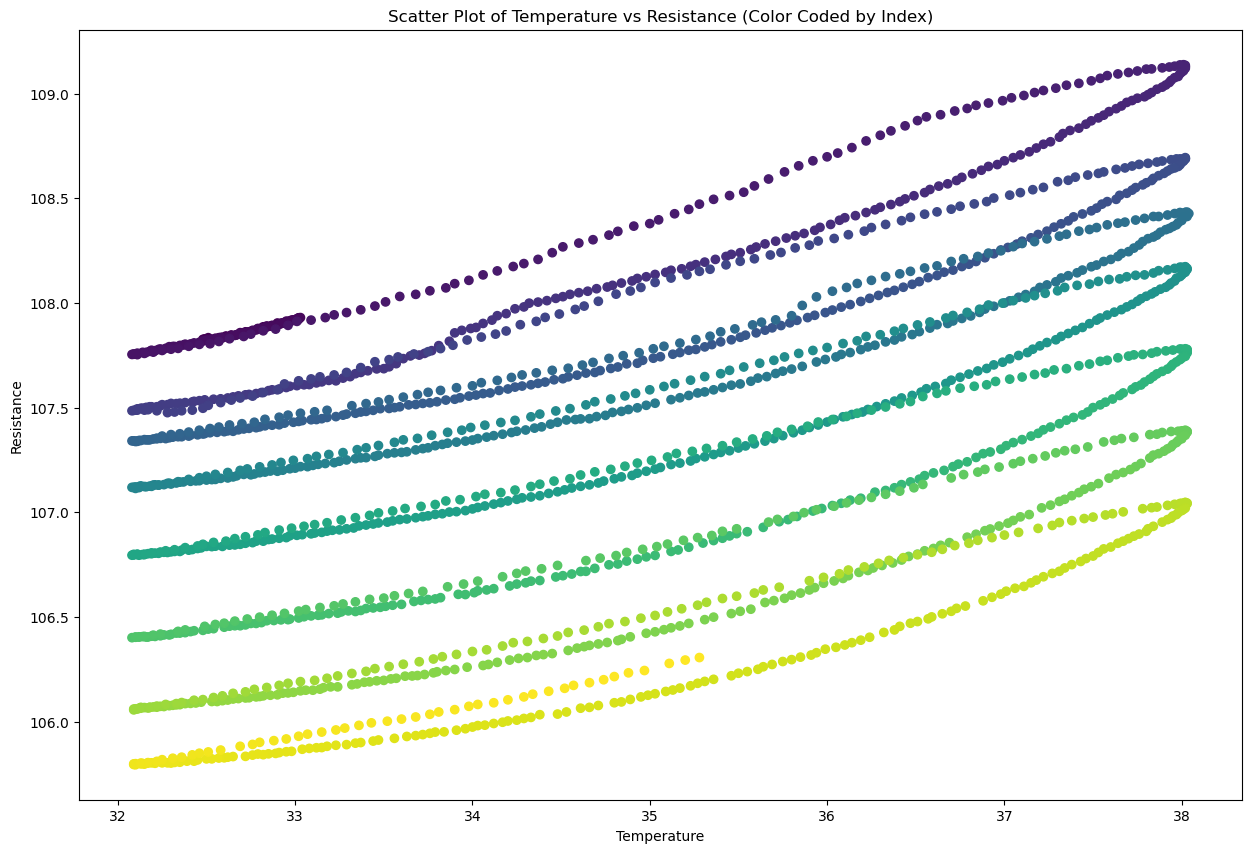

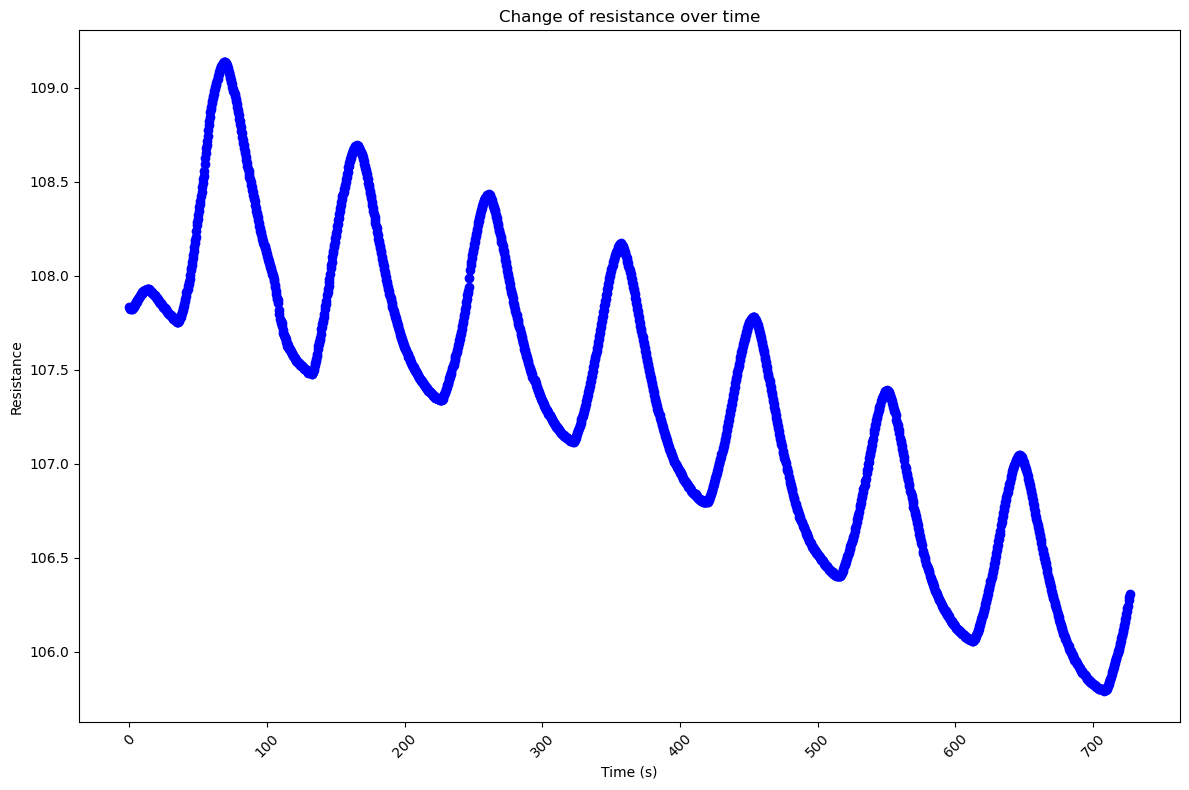

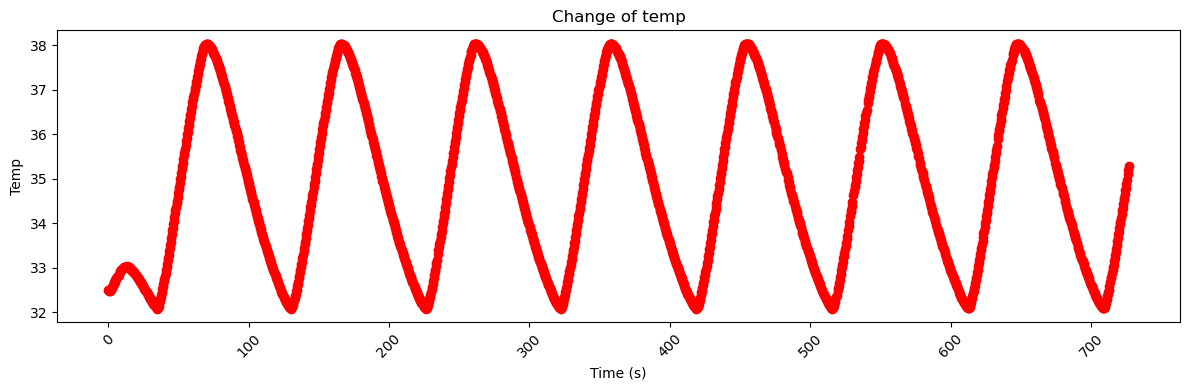

Average temperature:  34.90873532550694


In [2]:
plot("loop1.csv")

loop2.csv
filtered count: 6


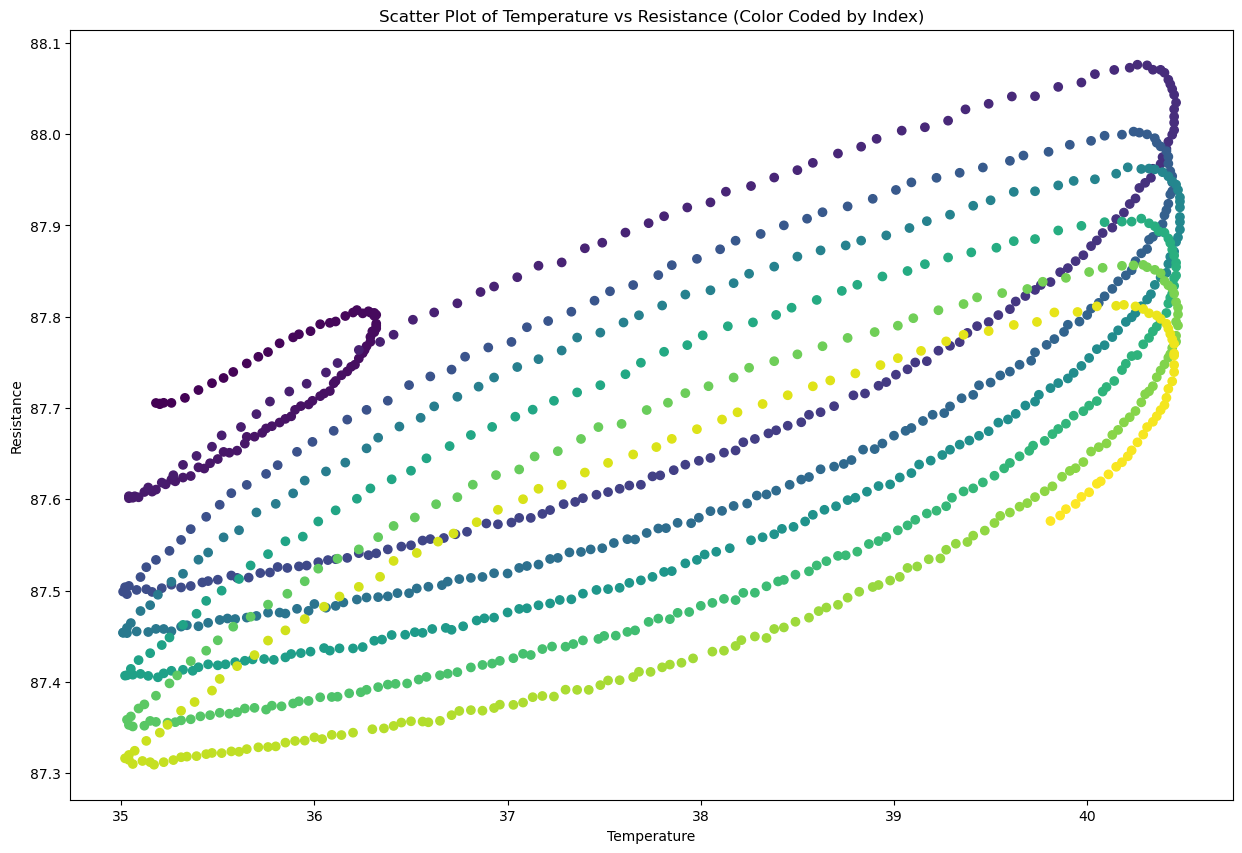

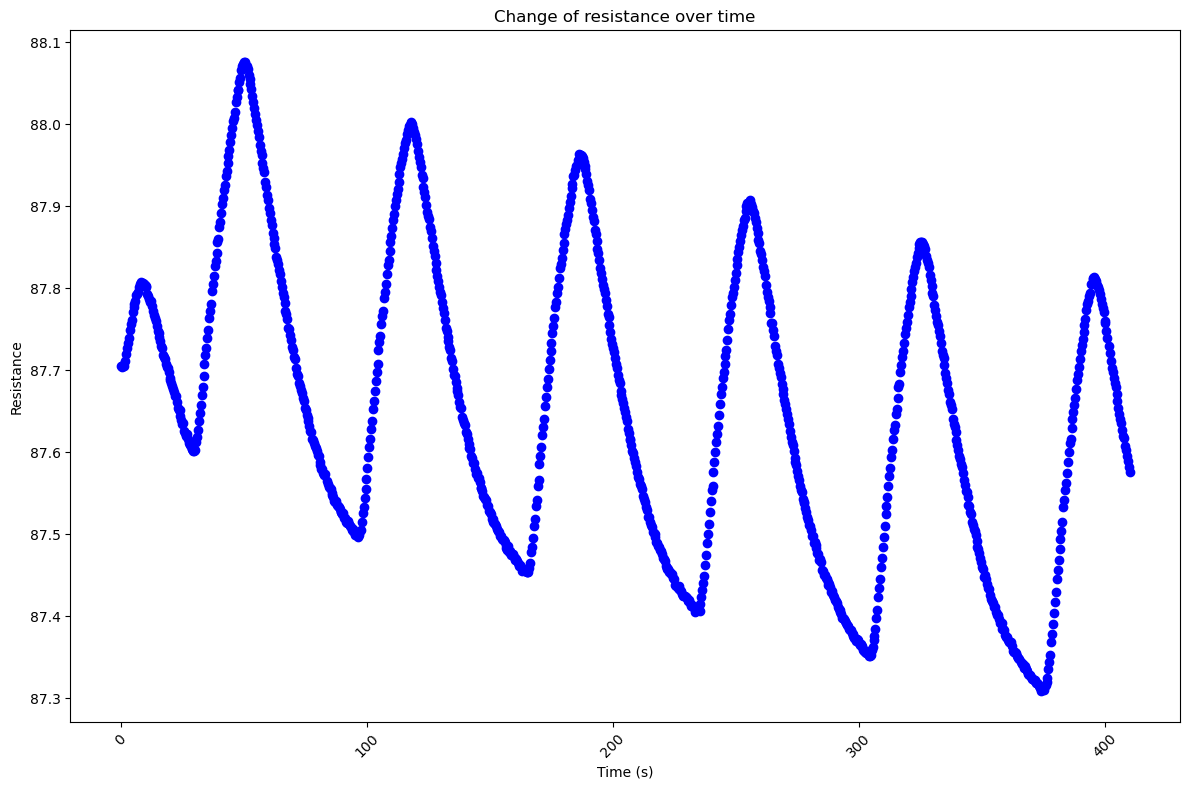

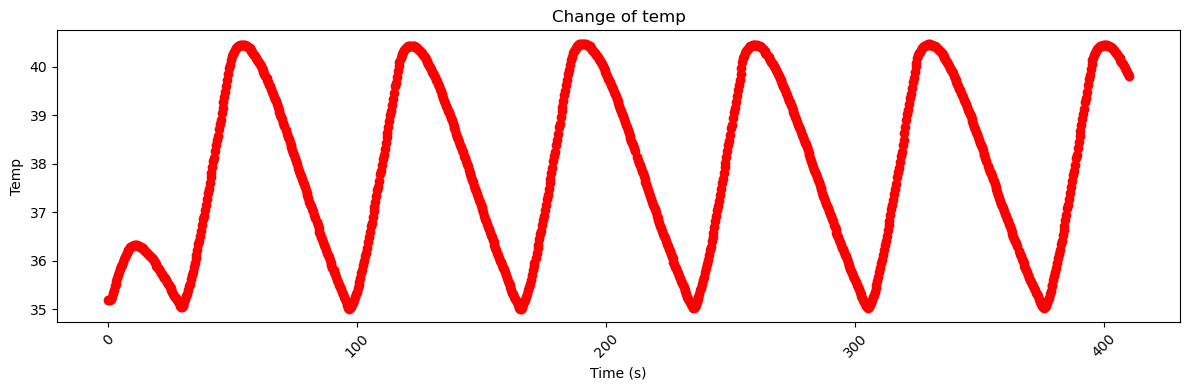

Average temperature:  37.83883593033914


In [3]:
plot("loop2.csv")

35C.csv
filtered count: 260


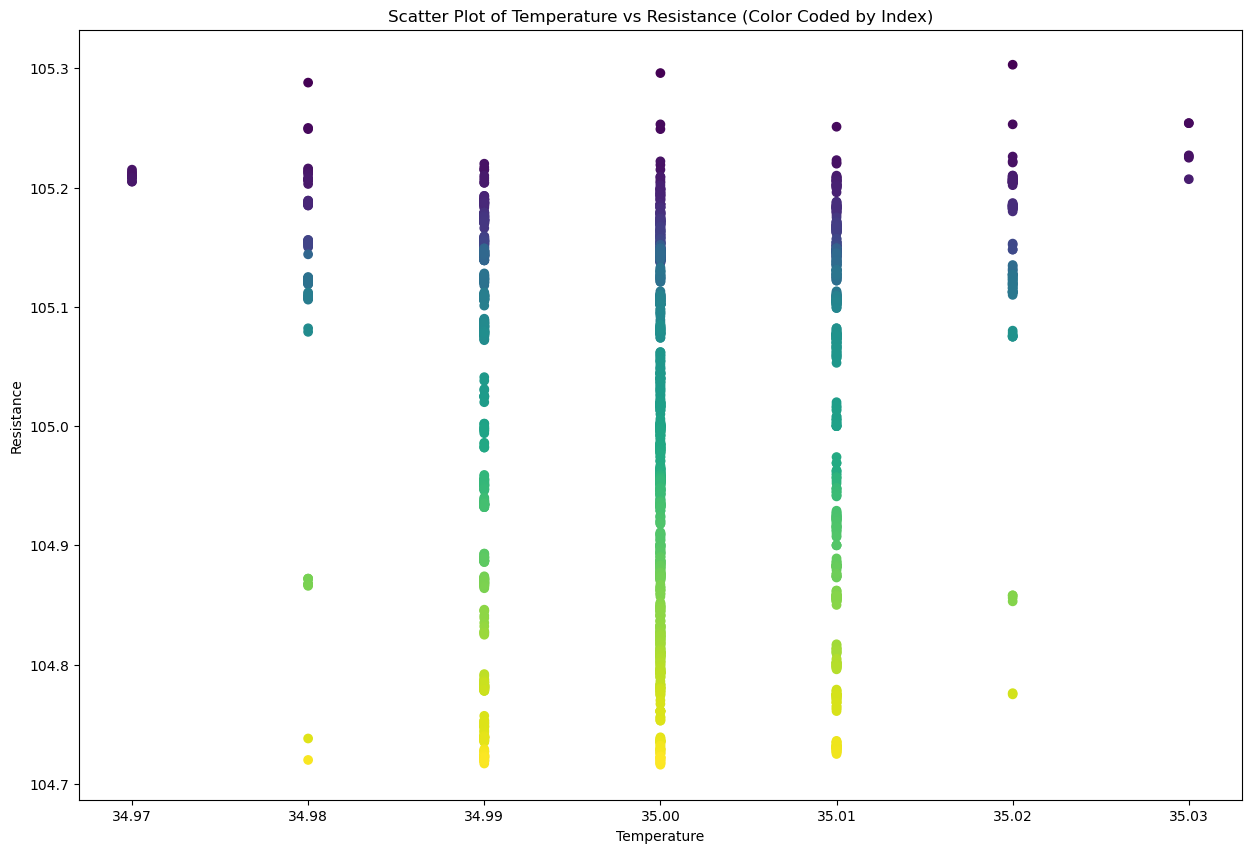

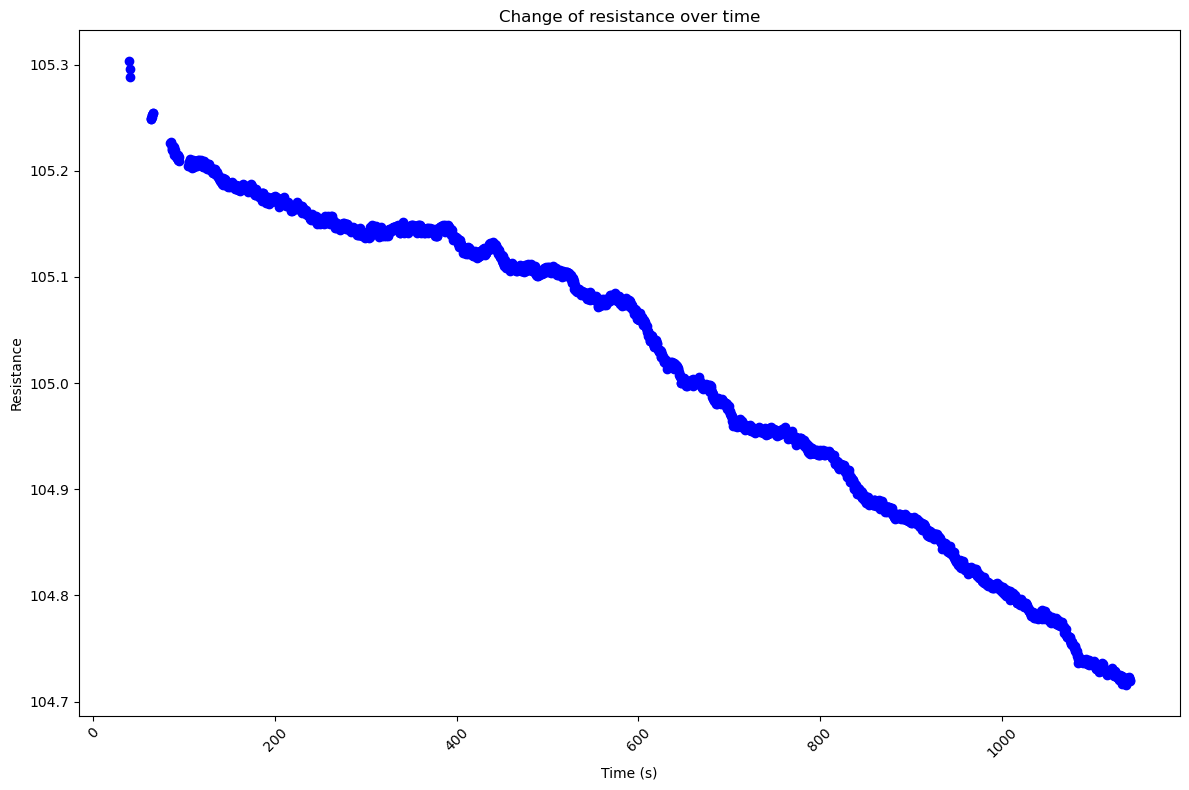

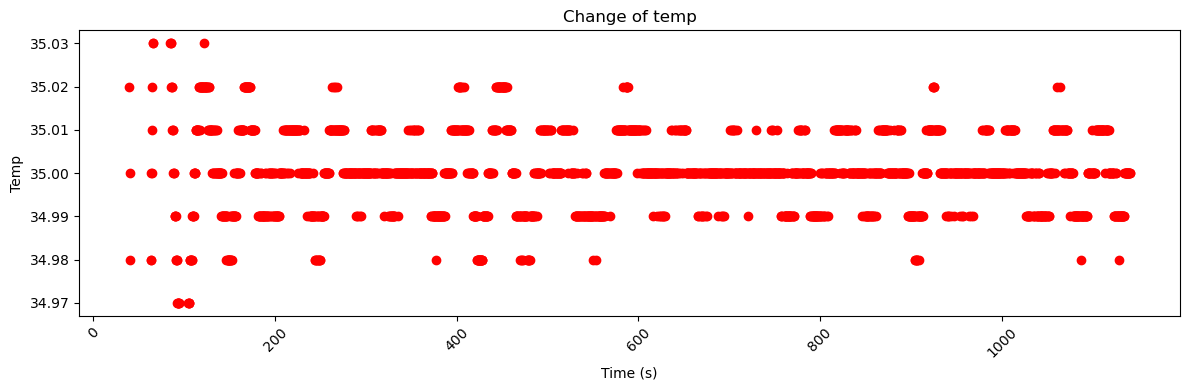

Average temperature:  35.00027099236642


In [4]:
plot("35C.csv")

steps1.csv
filtered count: 14


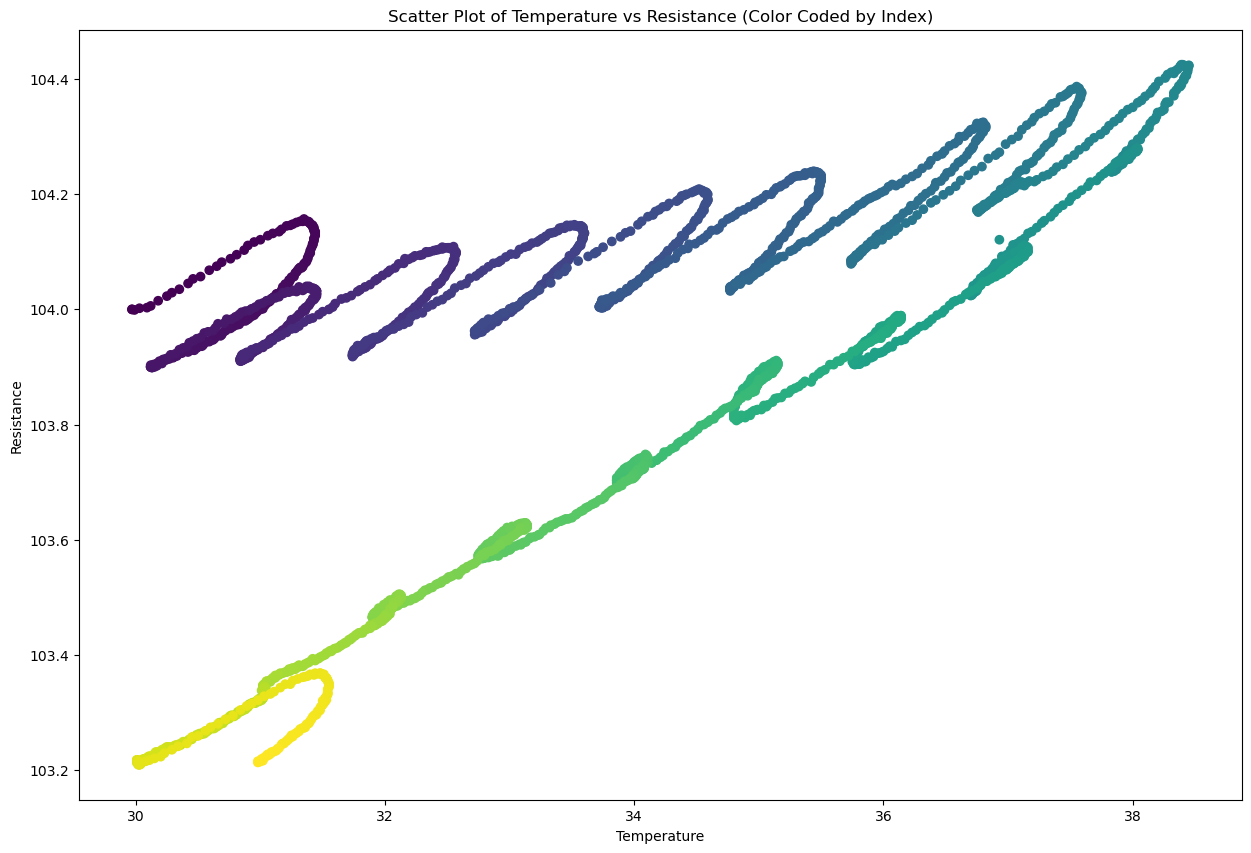

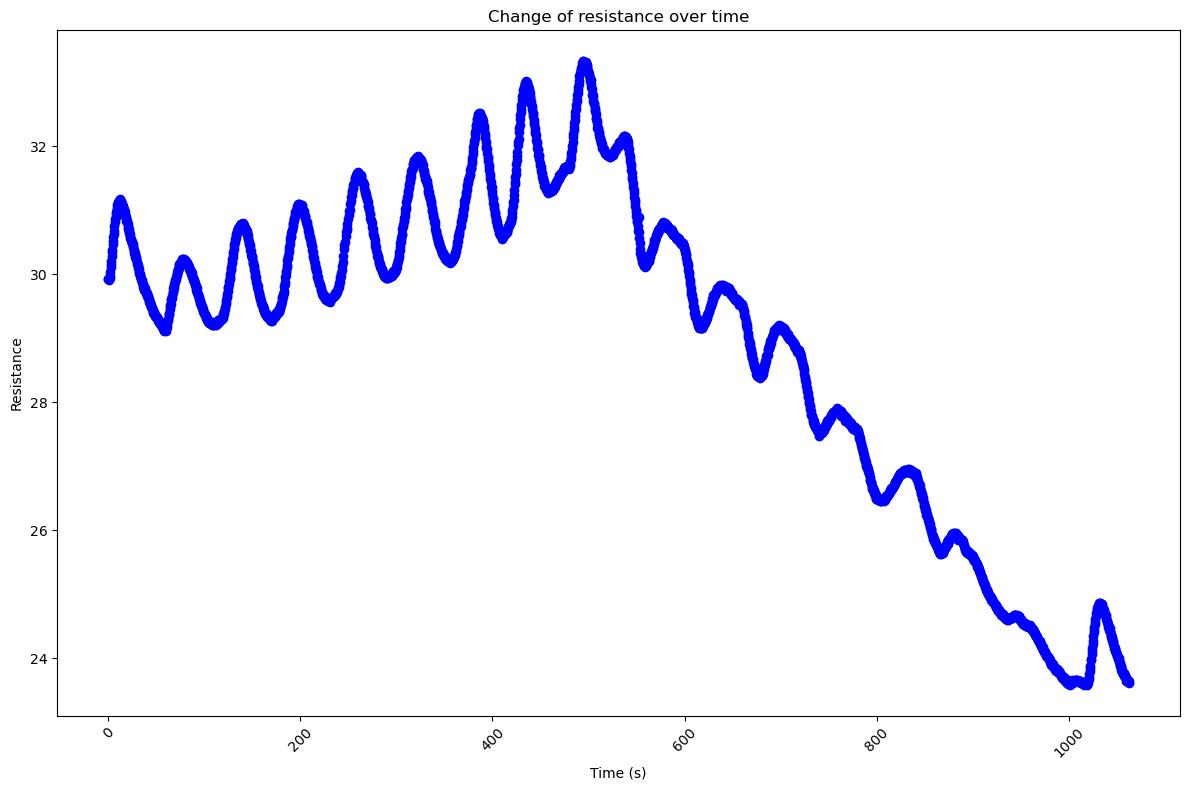

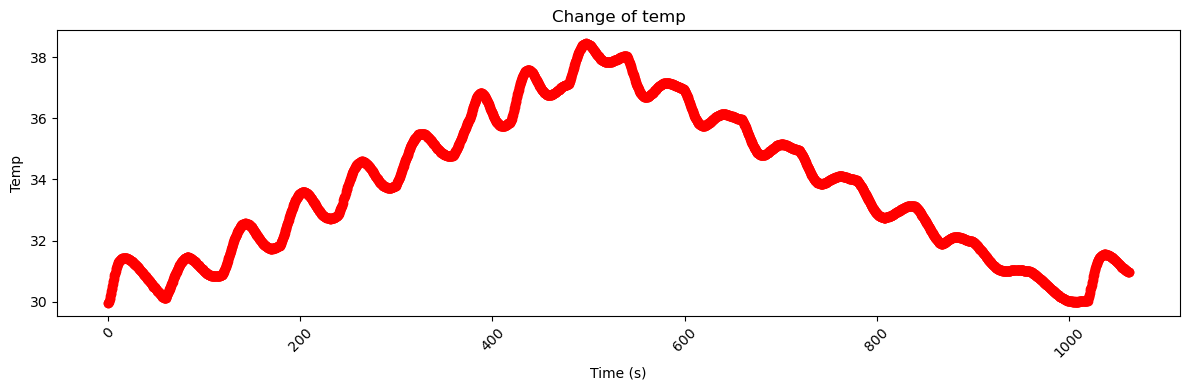

Average temperature:  33.77292875044755


In [5]:
    x0 = 30
    y0 = 32
    x1 = 104.010
    y1 = 104.260

    a = (y0-x0) / (y1-x1)
    b = y0 - (((y0-x0)*y1)/(y1-x1))

plot("steps1.csv", 1.6,a,b)

38C.csv
filtered count: 382


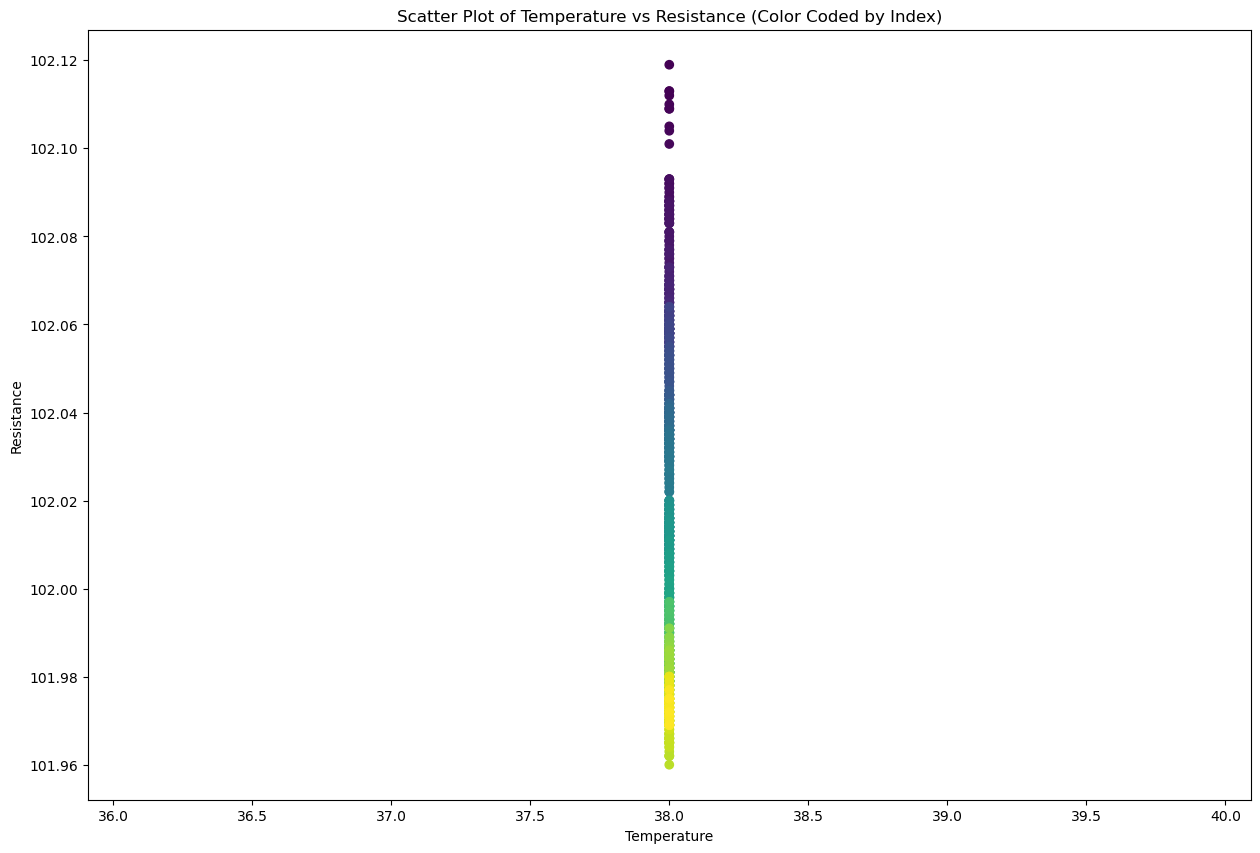

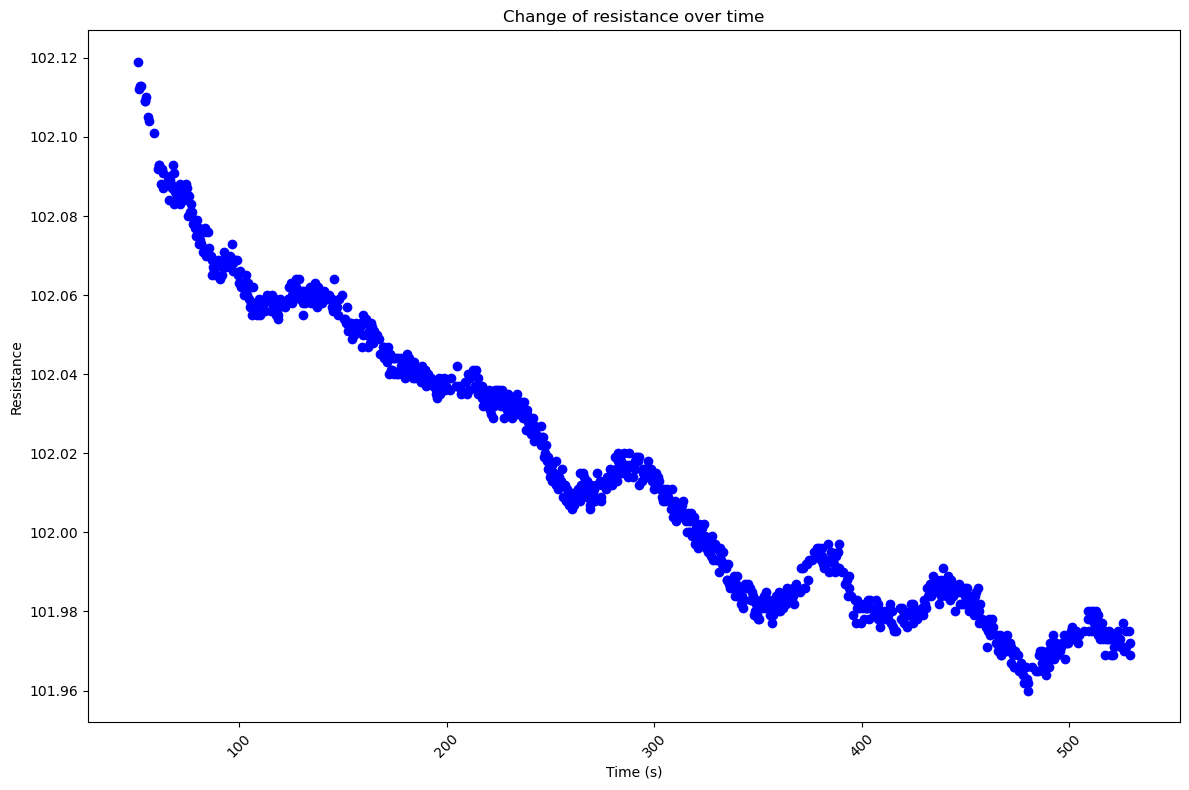

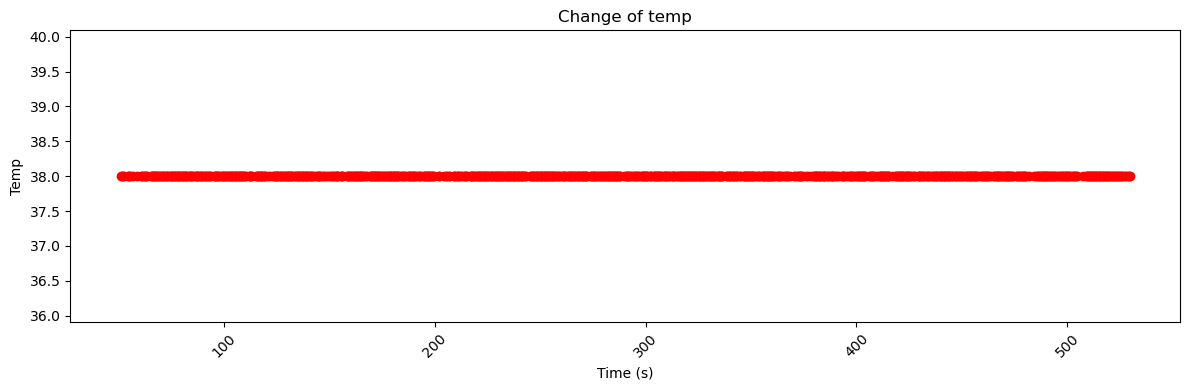

Average temperature:  38.0


In [6]:
plot("38C.csv", 3)

steps2.csv
filtered count: 6


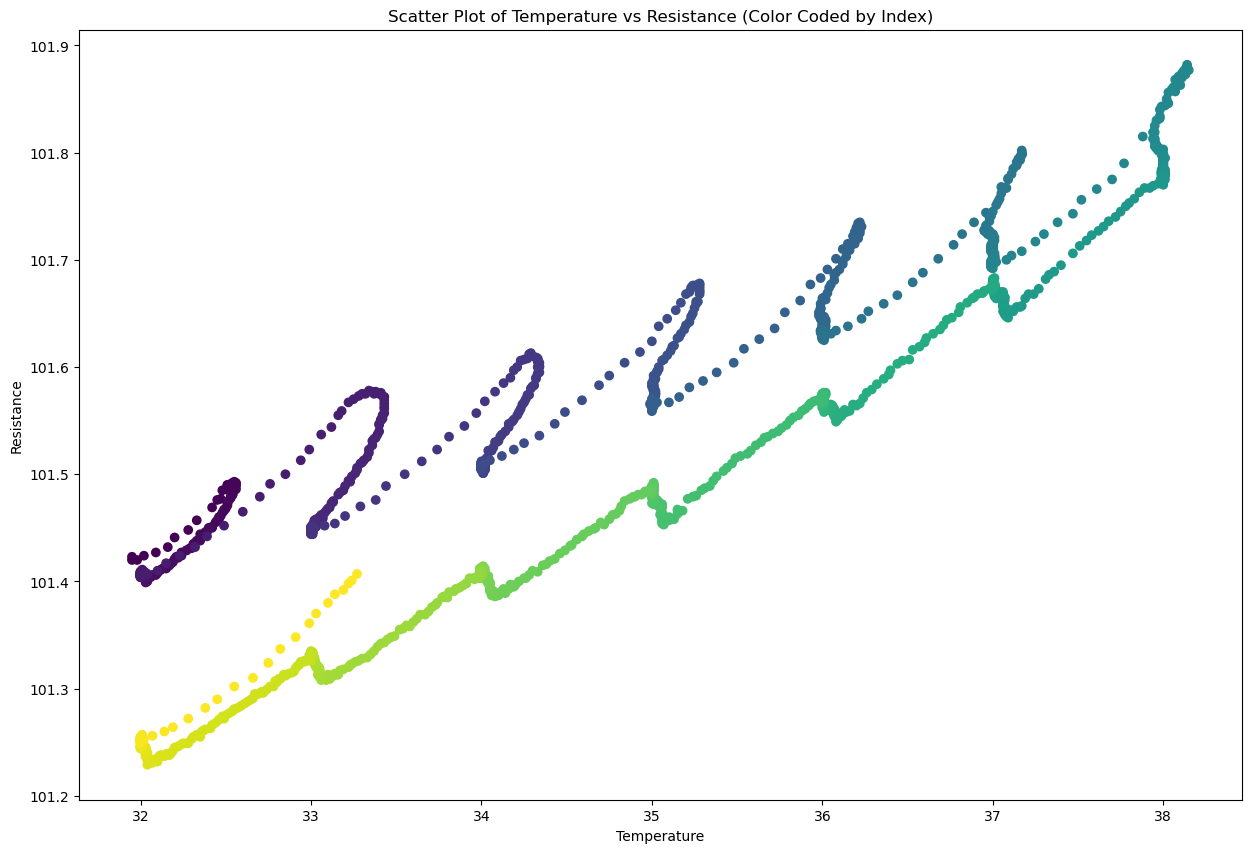

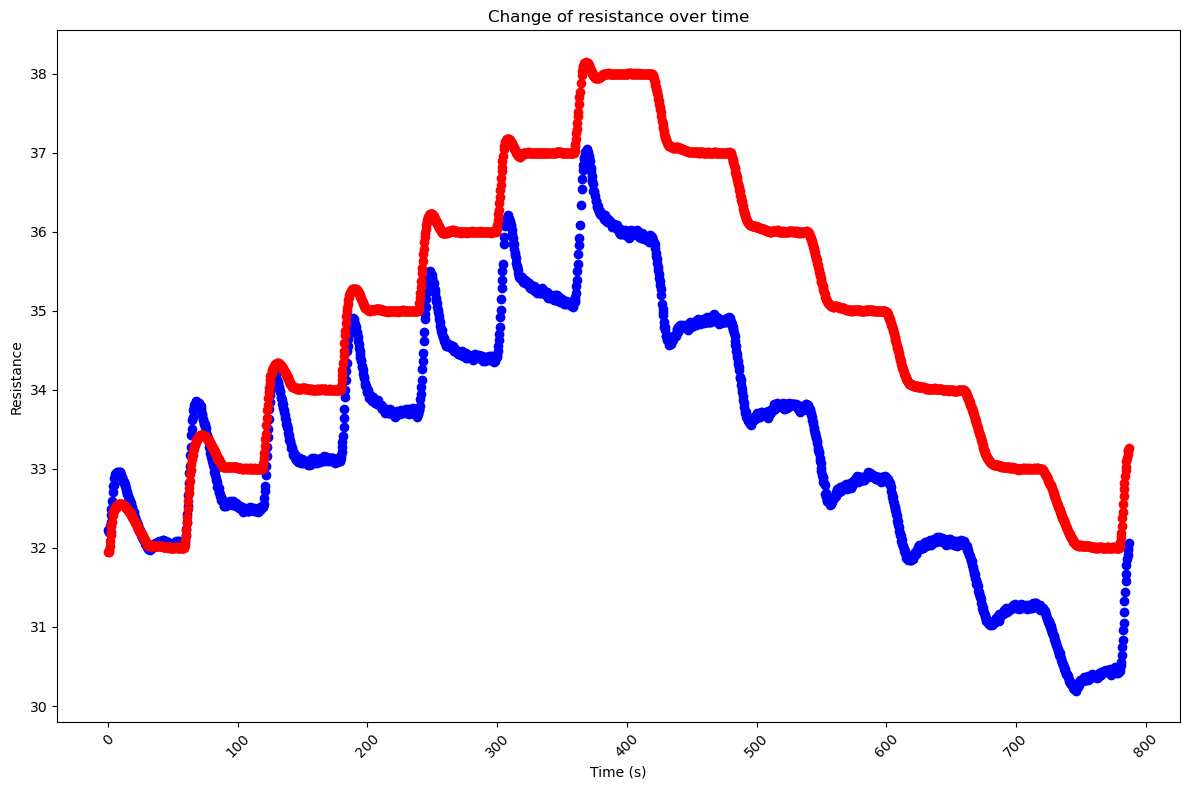

Average temperature:  34.836720116618075


In [7]:
x0 = 32
y0 = 38
x = 101.401
y = 101.973
#y = 101.8

a = (y0-x0) / (y-x)
b = y0 - (((y0-x0)*y)/(y-x))
plot("steps2.csv", 1.7,a,b,1)

38C2.csv
filtered count: 313


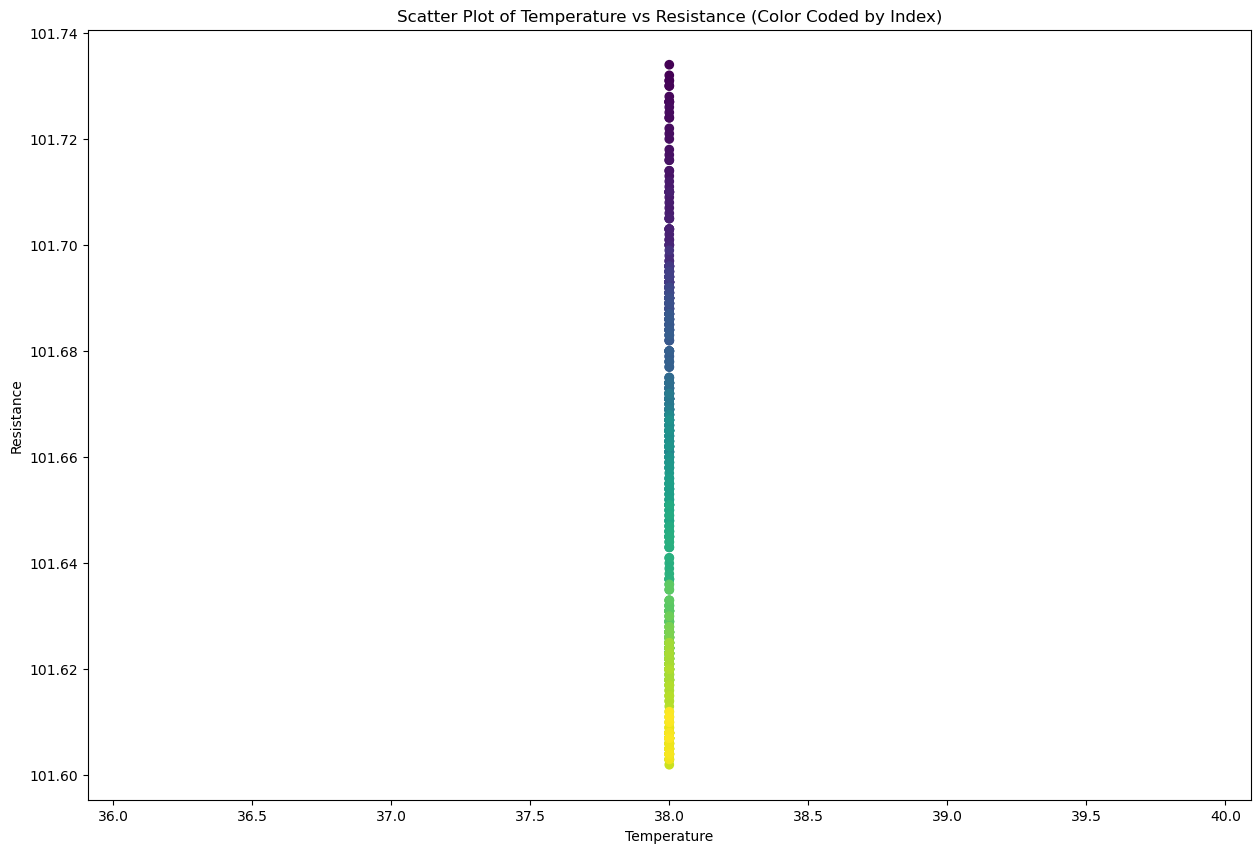

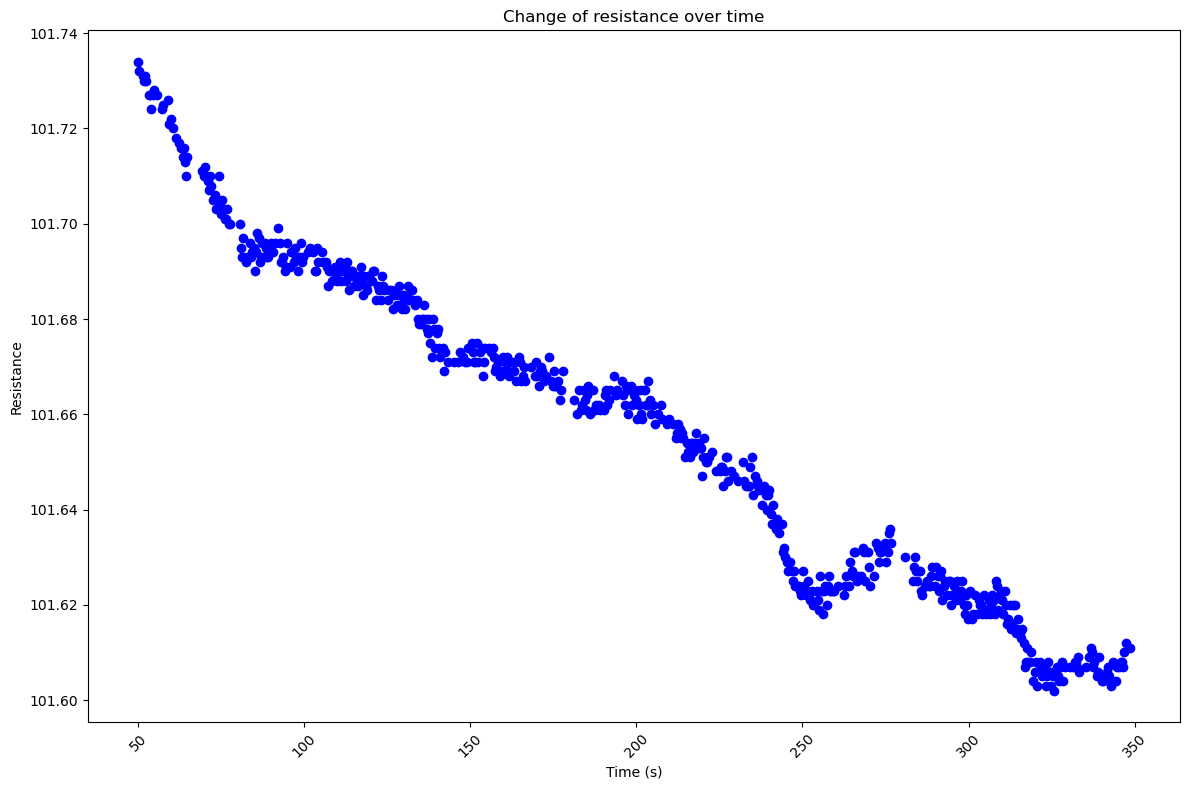

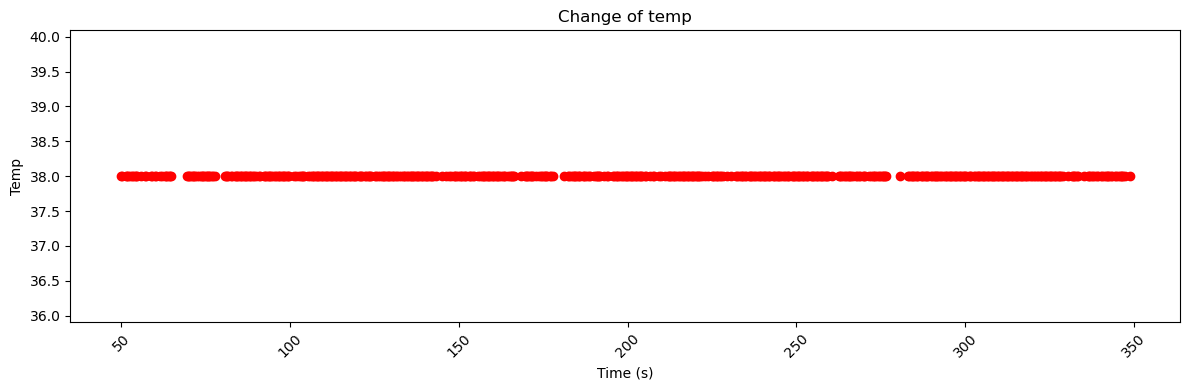

Average temperature:  38.0


In [8]:
plot("38C2.csv",2,1,0,0)

# Static 38C

32C.csv
filtered count: 395


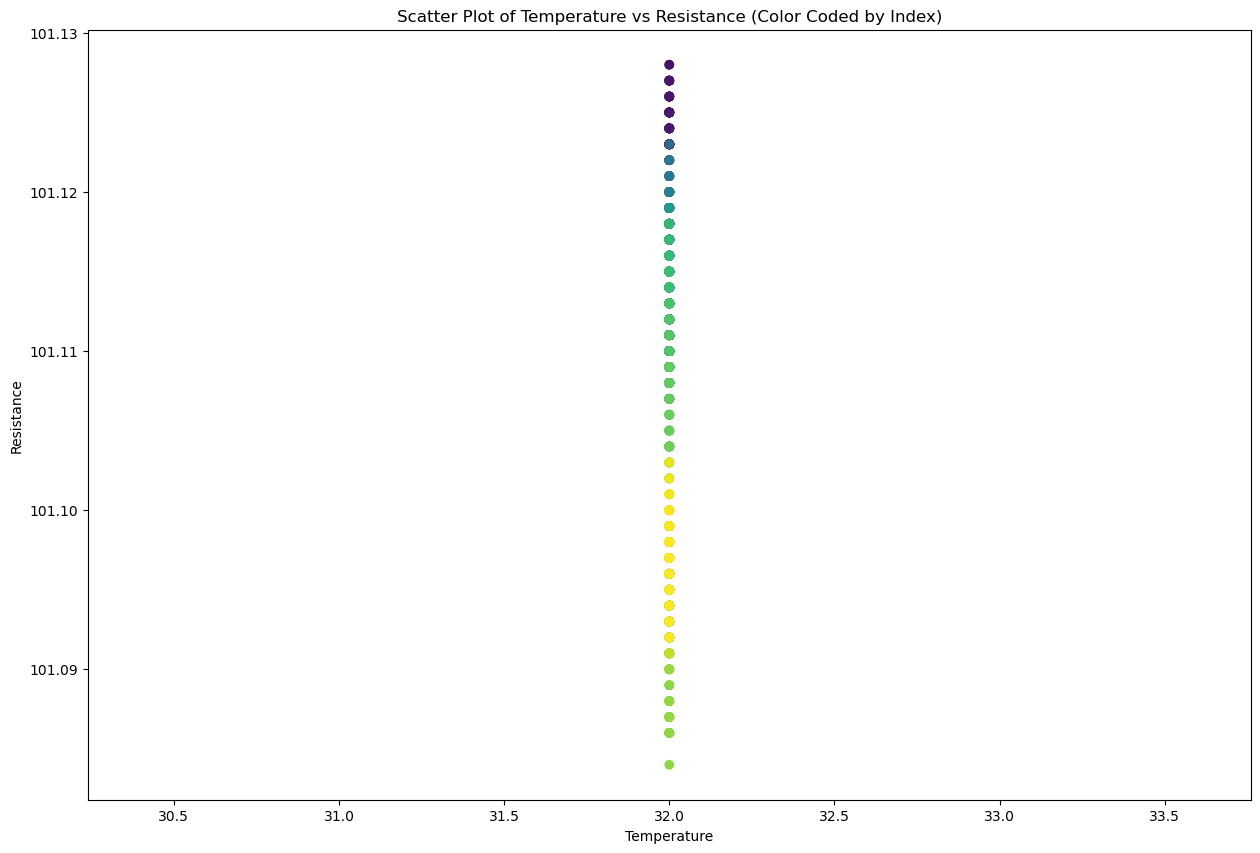

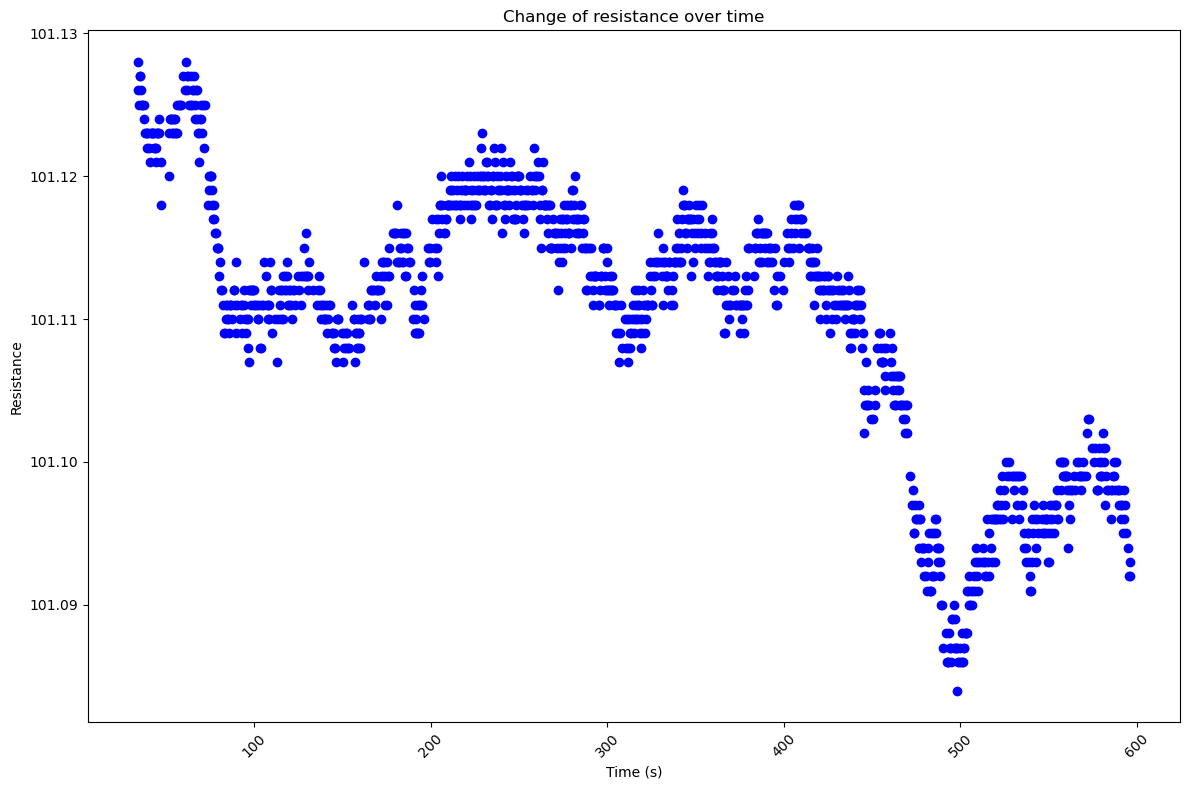

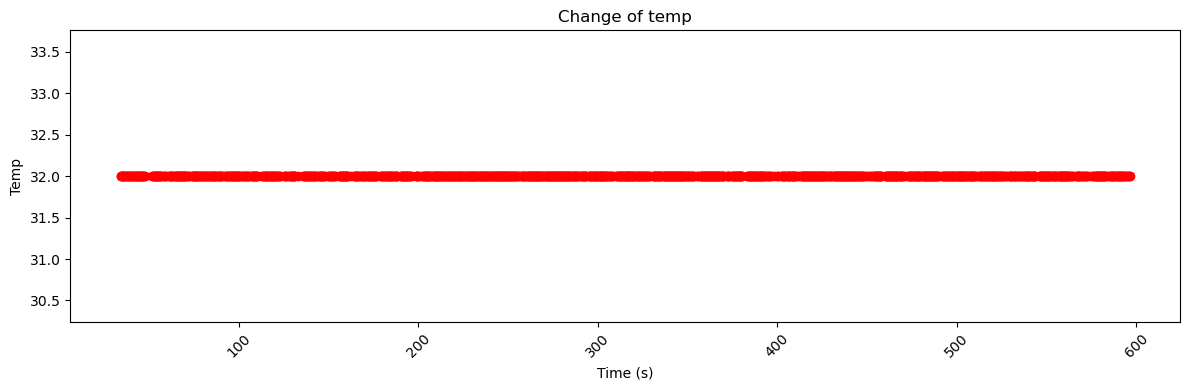

Average temperature:  32.0


In [9]:
x0 = 32
y0 = 38
x = 101.1
#y = 101.973
y = 101.9

a = (y0-x0) / (y-x)
b = y0 - (((y0-x0)*y)/(y-x))

plot("32C.csv",3,1,0,0)

#Static 32C

32C2.csv
filtered count: 149


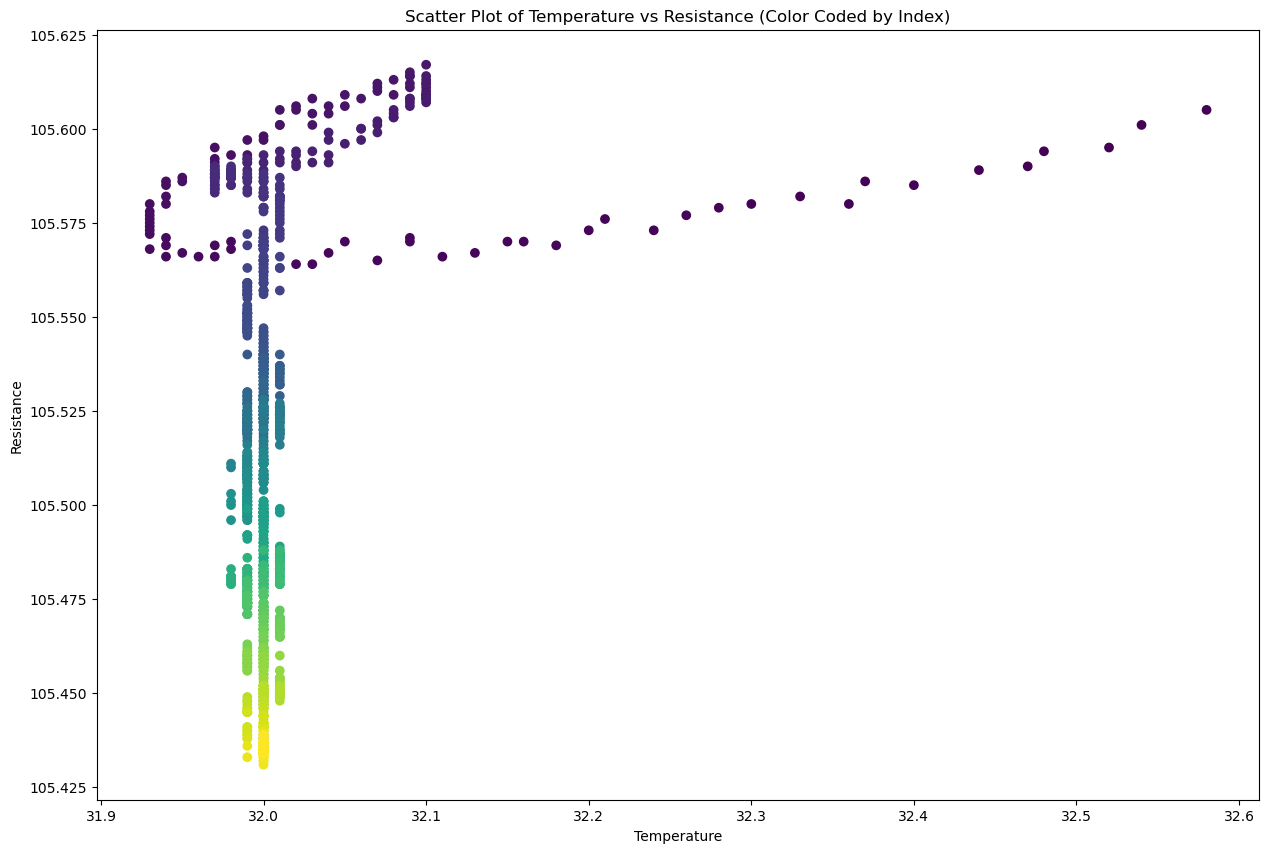

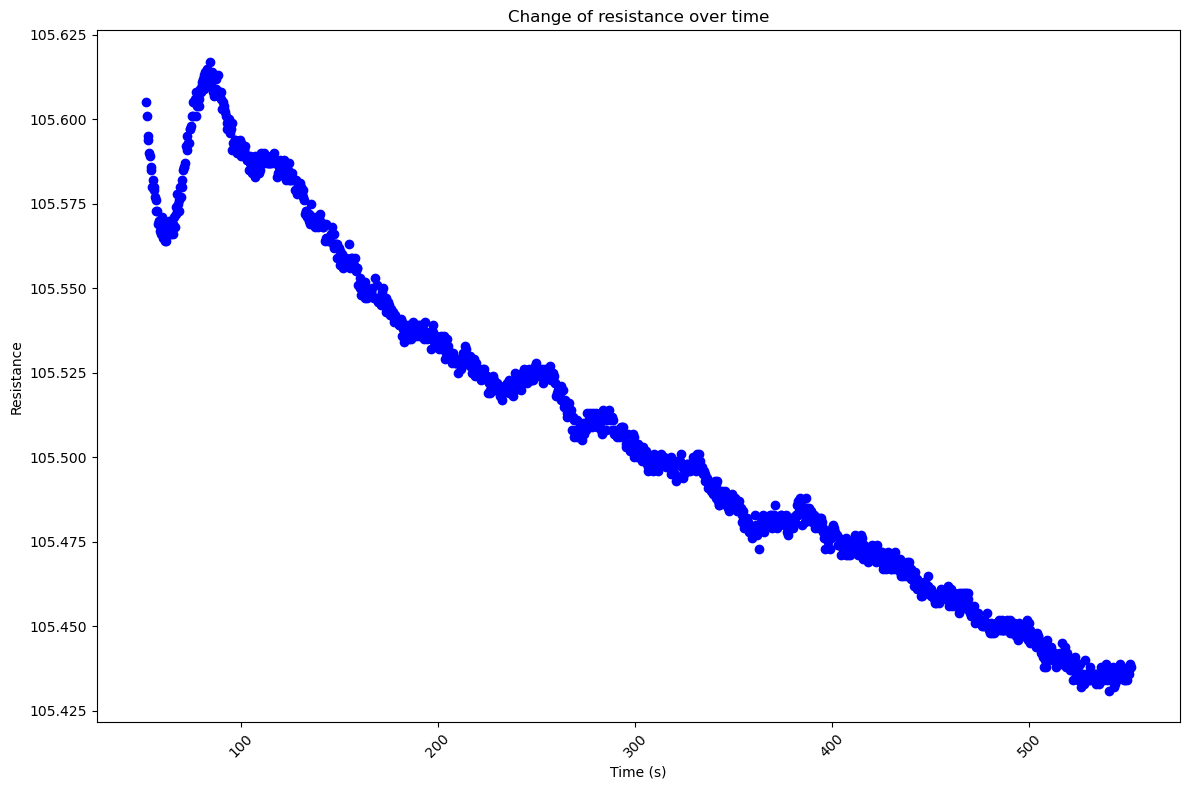

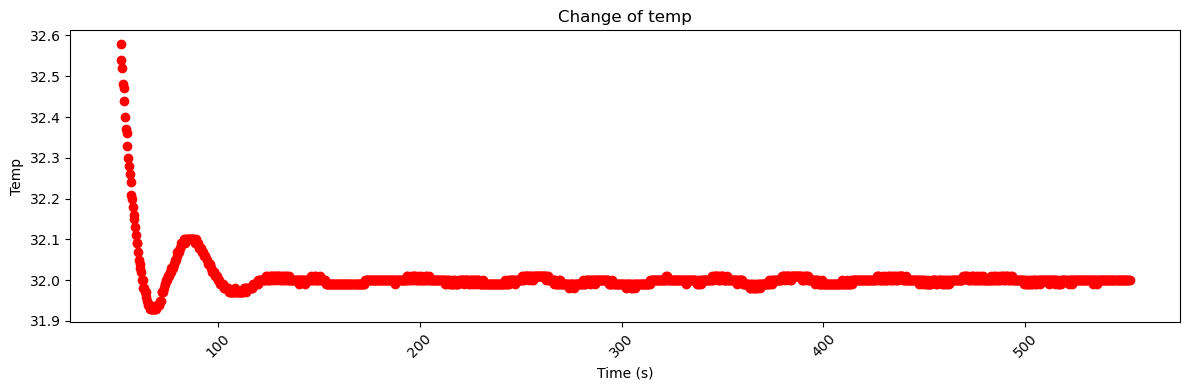

Average temperature:  32.005098634294384


In [10]:
plot("32C2.csv",30)

../Eka toimiva.csv
filtered count: 2


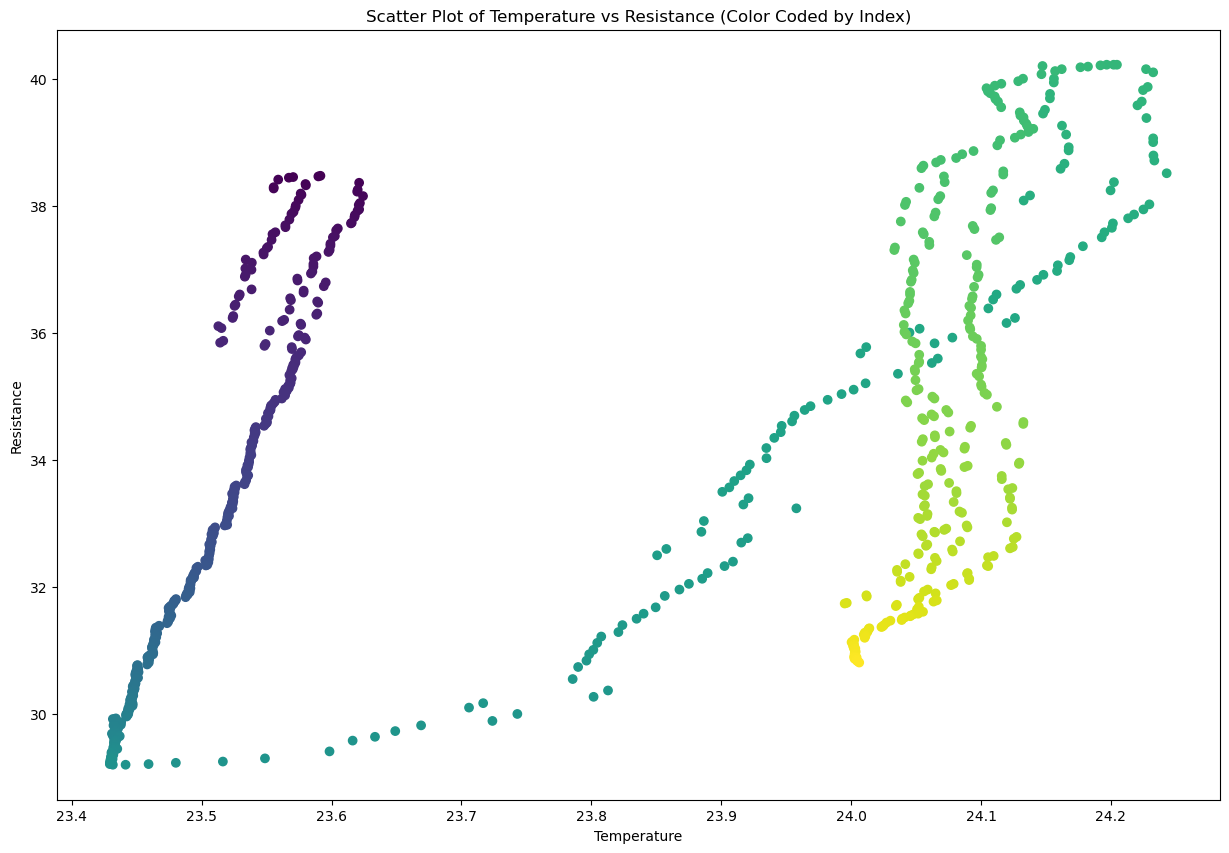

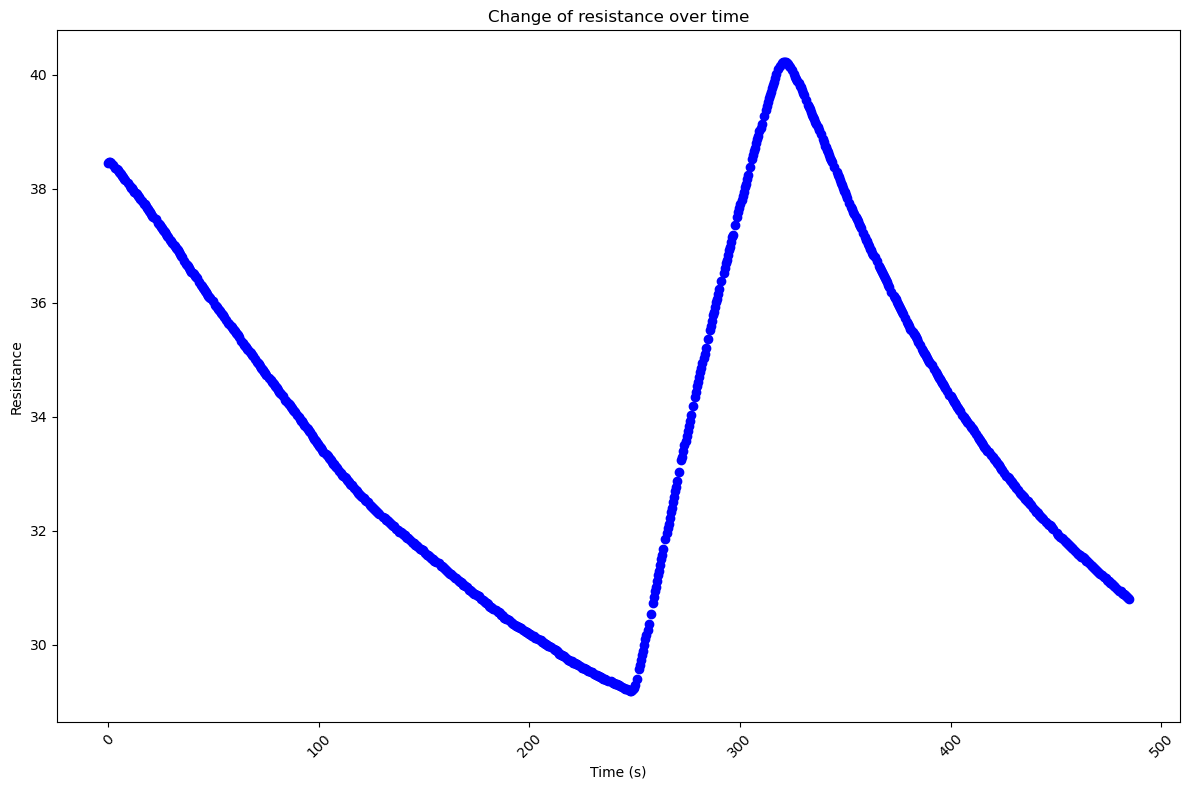

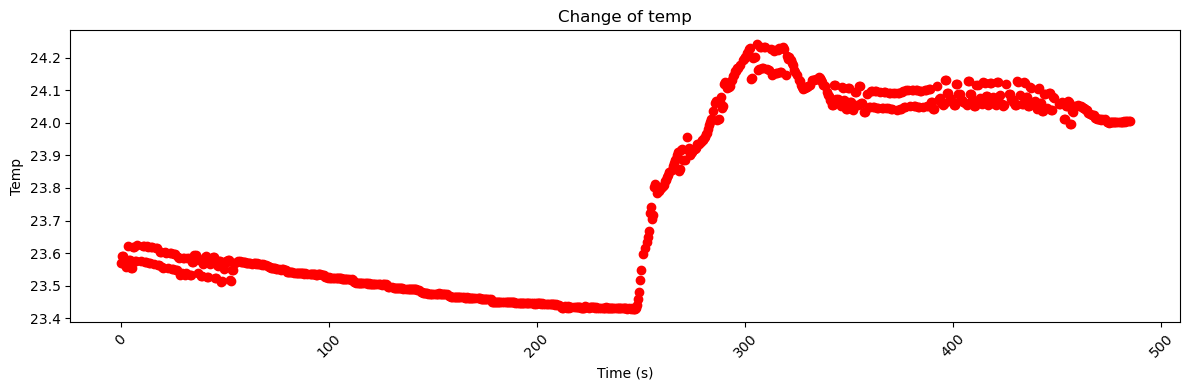

Average temperature:  23.768883232077766


In [11]:
import os

folder_path = '..'

# Loop through all files in the directory
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        length = df.shape[0]
        if length > 300:
            plot(file_path, 5)
        
